In [45]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
from scipy import stats
import re
import ast
import seaborn as sns

%matplotlib inline

In [17]:
os.chdir(r'/Users/andrewcaffey/Documents/Projects/Data/PCPP/parts/UPS/')
df = pd.read_csv('ups_csv.csv', low_memory=False)

In [24]:
cols = [u'avg', u'load_cap_w', u'load_cap_va', u'max_batt_recharge_time',\
       u'full_load', u'half_load']

In [47]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

x = df[(df.avg>0)&(df.load_cap_w>0)].load_cap_w
Y = df[(df.avg>0)&(df.load_cap_w>0)].avg

x = x.values.reshape(x.shape[0],1)
Y = Y.values.reshape(x.shape[0],1)

lreg.fit(x, Y, sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

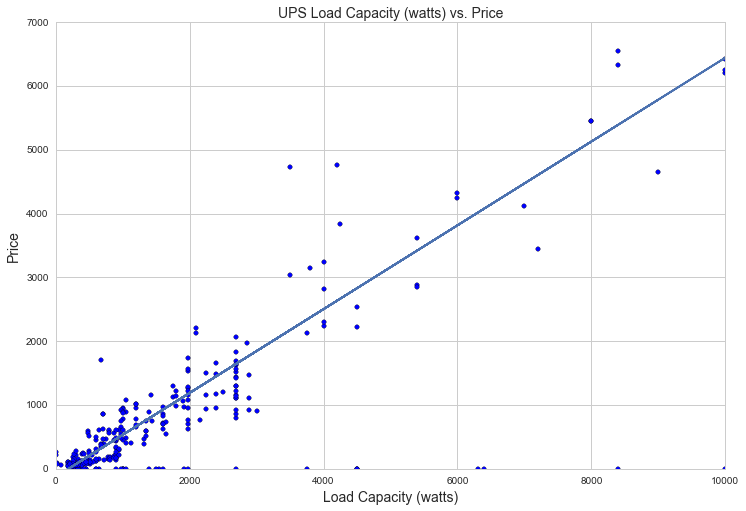

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.scatter(df.load_cap_w, df.avg)
plt.plot(x,lreg.predict(x))
plt.axis([0,10000,0,7000])
plt.title('UPS Load Capacity (watts) vs. Price', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Load Capacity (watts)', fontsize=14)

In [50]:
lreg.score(x, Y, sample_weight=None)

0.9036450526232076